<a href="https://colab.research.google.com/github/codebysumit/handwritten-digit-classification/blob/master/Handwritten_Digit_Classification_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install all requirements

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install scikit-learn

In [ ]:
!pip install seaborn
!pip install opencv-python

## Importing all dependence

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import math
import seaborn as sn
import cv2

## Import mnist datasets

x_[train/test] = grayscale images array

y_[train/test] = images labels array

In [ ]:
DATASET_SIZE = 70000
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.1

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

X = np.concatenate([X_train, X_test])
Y = np.concatenate([Y_train, Y_test])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=(1-TRAIN_RATIO))
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

## Visualise data set

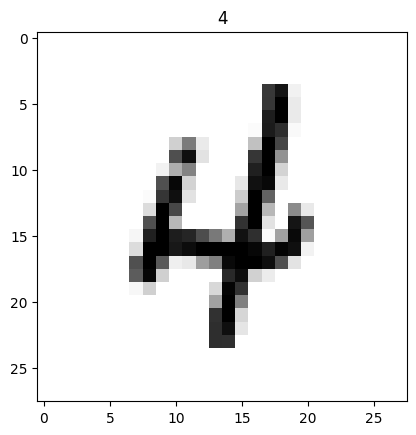

In [ ]:
# print(x_train)
# print(x_train[0])

# Plot 1st Image
# plt.imshow(x_train[0], cmap='gray', vmin=0, vmax=255)
plt.imshow(x_train[0], cmap='gray_r', vmin=0, vmax=255)
plt.title(y_train[0])
plt.show()

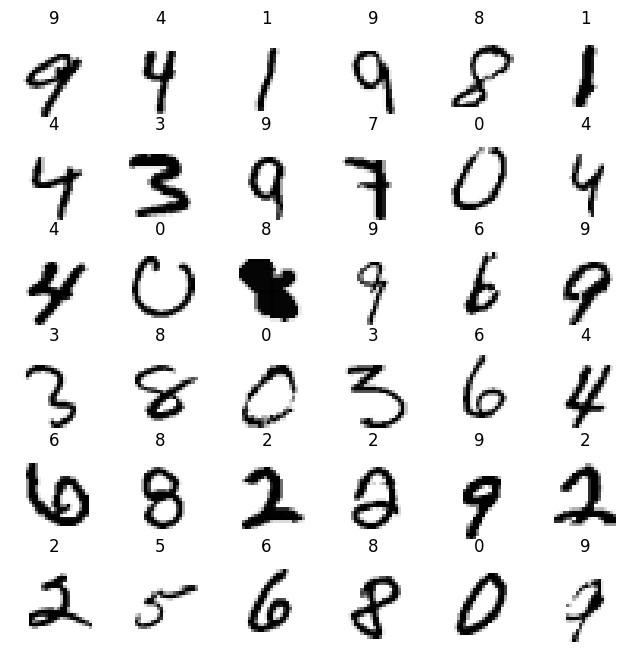

In [ ]:
w = 10
h = 10

fig = plt.figure(figsize=(8, 8))

columns = 6
rows = 6

for i in range(1, columns*rows +1):
    random_index = np.random.randint(y_train.shape[0])
    fig.add_subplot(rows, columns, i)
    plt.imshow( x_train[random_index], cmap='gray_r', vmin=0, vmax=255)
    plt.axis('off')
    plt.title(y_train[random_index])
plt.show()

## Normalised Images data

"1 to 225" => "0 to 1"

In [ ]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_val = tf.keras.utils.normalize(x_val,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

## Visualise normalise data

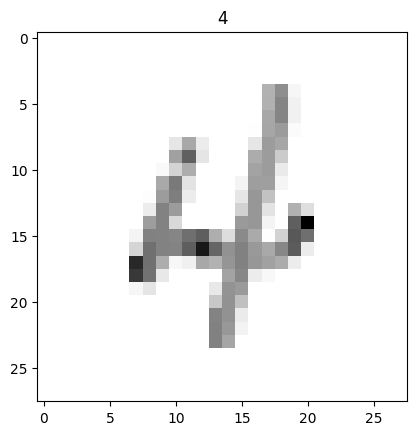

In [ ]:
# x_train[0]

# plt.imshow( x_train[0], cmap='gray_r', vmin=0, vmax=1)
plt.imshow(x_train[0] ,cmap=plt.cm.binary)
plt.title(y_train[0])
plt.show()

In [ ]:
# plt.cm.binary

## Create a Sequential Model


**What are Sequential Models?**

Sequential models process data in a specific order, step by step, where each step depends on the previous one. They are widely used in tasks involving time, order, or progression. For example:

- Text (processed word by word)
- Time-series data (like stock prices or weather trends)
- Audio (processed frame by frame)


**Why are Sequential Models Common?**

1. Real-World Applications:
Many real-world problems involve sequential data, such as speech recognition, language translation, and predictive modeling. Sequential models naturally align with these tasks.


2. Dependency on Order:
In tasks like natural language processing (NLP), the meaning often depends on the sequence of words. For example, "I eat breakfast after exercise" has a completely different meaning from "I exercise after breakfast."


3. Dynamic Behavior:
Sequential models like recurrent neural networks (RNNs) and Long Short-Term Memory (LSTM) networks can learn patterns over time and adapt to varying inputs.


4. Versatility:
They can be applied to numerous fields like healthcare, finance, and customer behavior prediction, making them broadly useful.

In [ ]:
# Initialize a Sequential model
model = tf.keras.models.Sequential()

# Rename model
model.name="sequential_digit"

# Add Input layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# The Flatten layer converts 2D input (28x28 images) into a 1D array for the dense layers.

# Add hidden layers
# reshape input layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# First hidden layer with 128 neurons and ReLU activation function.
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
# Second hidden layer with 128 neurons and ReLU activation function.

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# Add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Output layer with 10 neurons (for 10 classes) and Softmax activation function.
# Softmax outputs probabilities for each class.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_digit"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,306 (591.04 KB)

 Trainable params: 151,306 (591.04 KB)

 Non-trainable params: 0 (0.00 B)

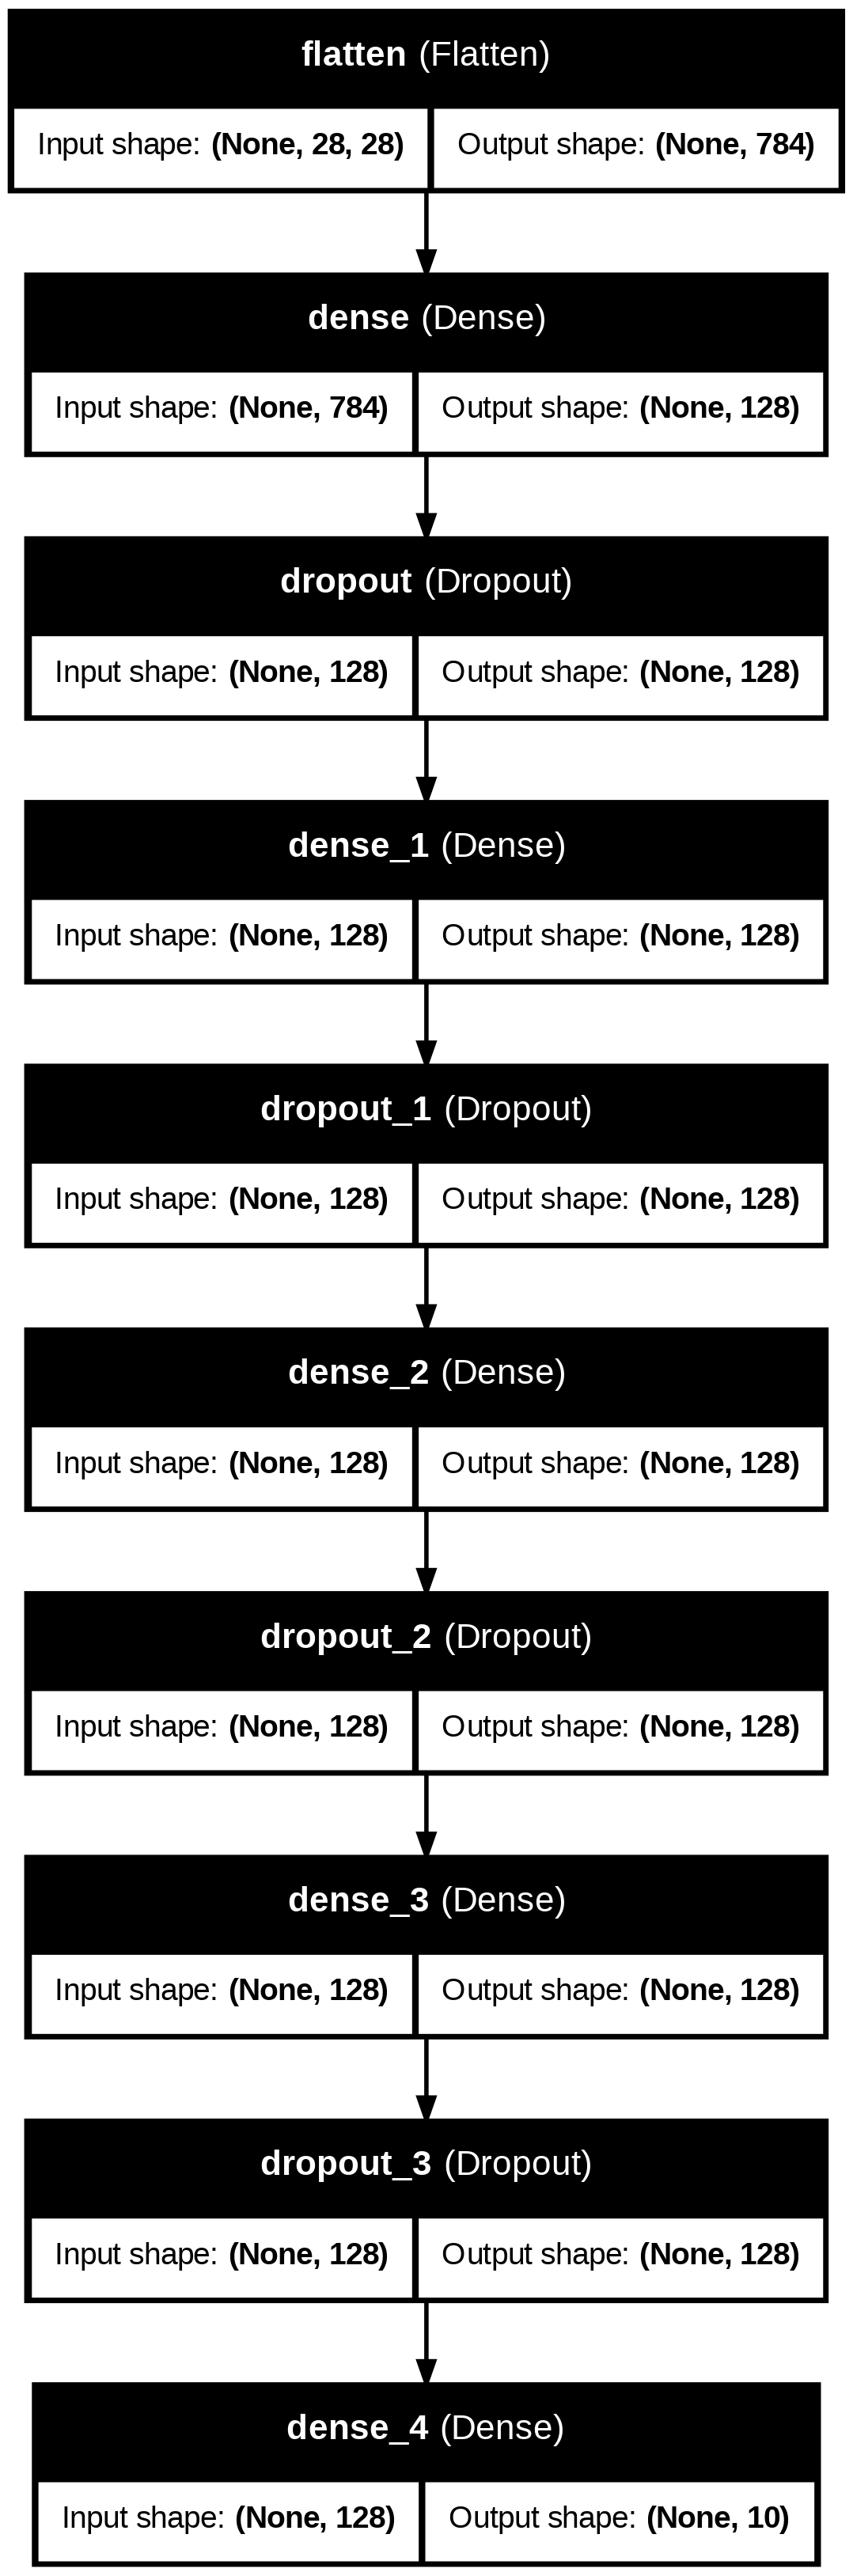

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Compiled Model

In [ ]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
              )

## Train Model

In [ ]:
history = model.fit(x_train,y_train, batch_size=64, epochs=80, validation_data=(x_val,y_val))

Epoch 1/80
766/766 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7371 - loss: 0.8116 - val_accuracy: 0.9499 - val_loss: 0.1638
Epoch 2/80
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9407 - loss: 0.2026 - val_accuracy: 0.9611 - val_loss: 0.1356
Epoch 3/80
766/766 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9571 - loss: 0.1491 - val_accuracy: 0.9657 - val_loss: 0.1107
Epoch 4/80
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9643 - loss: 0.1260 - val_accuracy: 0.9674 - val_loss: 0.1118
Epoch 5/80
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9679 - loss: 0.1074 - val_accuracy: 0.9709 - val_loss: 0.1018
Epoch 6/80
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9712 - loss: 0.0953 - val_accuracy: 0.9706 - val_loss: 0.1056
Epoch 7/80
766/766 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9734 - loss: 0.0917 - val_accuracy: 0.9728 - val_loss: 0.0957
Epoch 8/80
766/766 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9774 - loss: 0.0745 - val_accuracy: 

## Check model accuracy and loss

In [ ]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.1353
loss->  0.12070565670728683 
acc->  0.9768604636192322


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


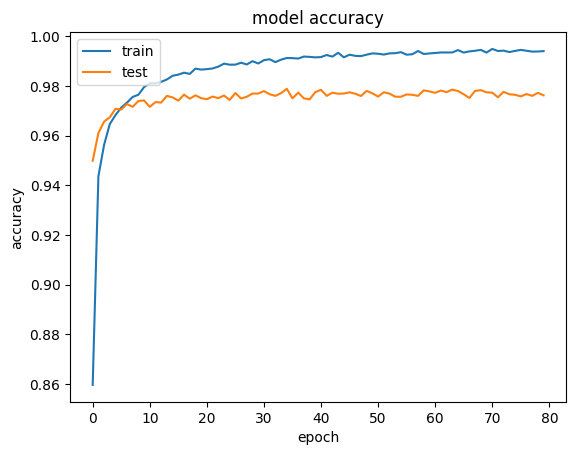

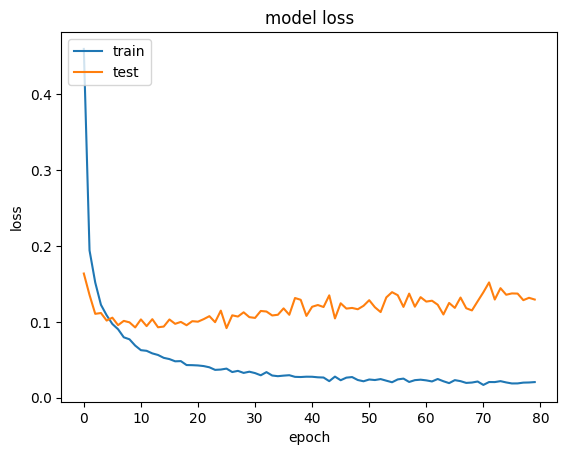

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

In [ ]:
predictions=model.predict([x_test])
print('label -> ',y_test[24])
print('prediction -> ',np.argmax(predictions[24]))

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
label ->  6
prediction ->  6


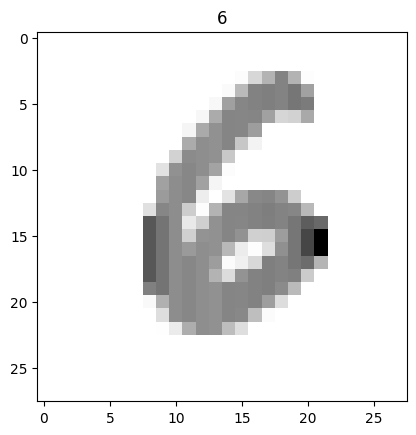

In [ ]:
plt.imshow(x_test[24], cmap=plt.cm.binary)
plt.title(y_test[24])
plt.show()

## Saving and testing model

### saving the model

In [ ]:
#saving the model
# .h5 or .model can be used

model.save('num_reader.h5')

### loading the saved model

In [ ]:
new_model = tf.keras.models.load_model('num_reader.h5')

In [ ]:
predictions=new_model.predict([x_test])


print('label -> ',y_test[8])
print('prediction -> ',np.argmax(predictions[8]))

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
label ->  9
prediction ->  9


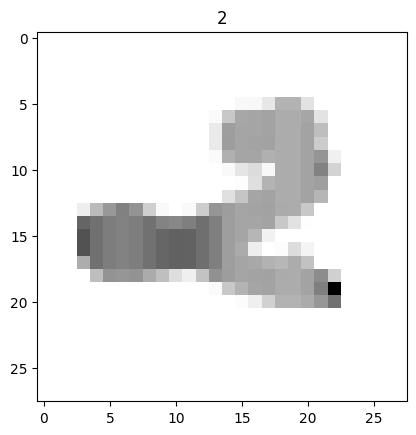

In [ ]:
plt.imshow(x_test[58], cmap=plt.cm.binary)
plt.title(y_test[58])
plt.show()

## Visualise validation predicted data on how the digits were written

In [ ]:
predictions_one_hot = new_model.predict([x_test])

print('predictions_one_hot:', predictions_one_hot.shape)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
predictions_one_hot: (7001, 10)


In [ ]:
predictions = np.argmax(predictions_one_hot, axis=1)

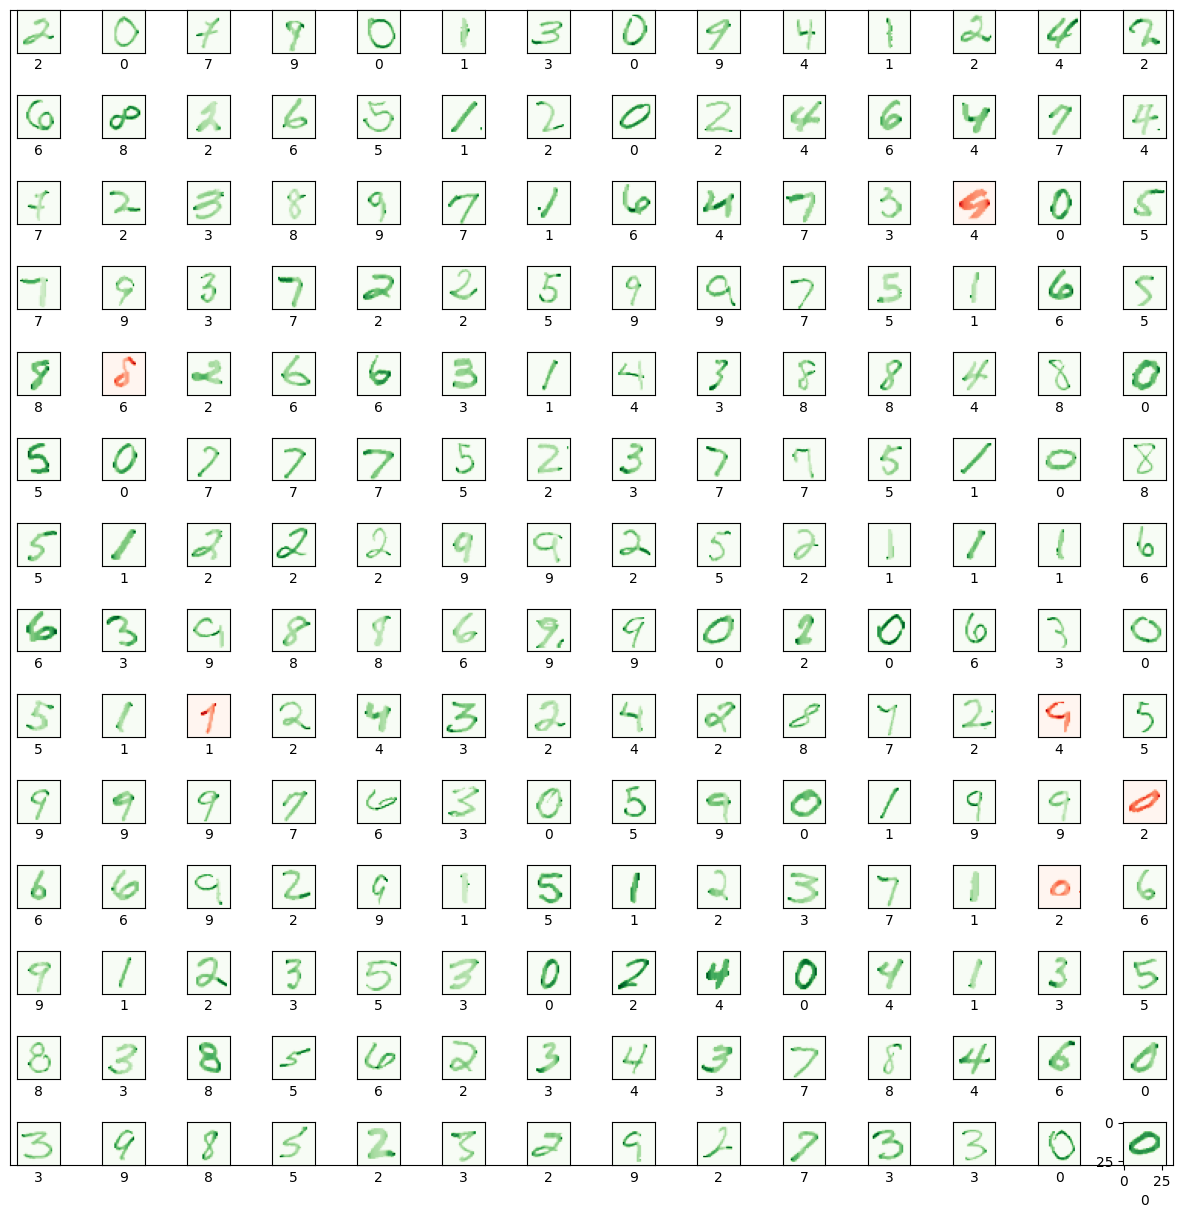

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Confusion matrix of test dataset

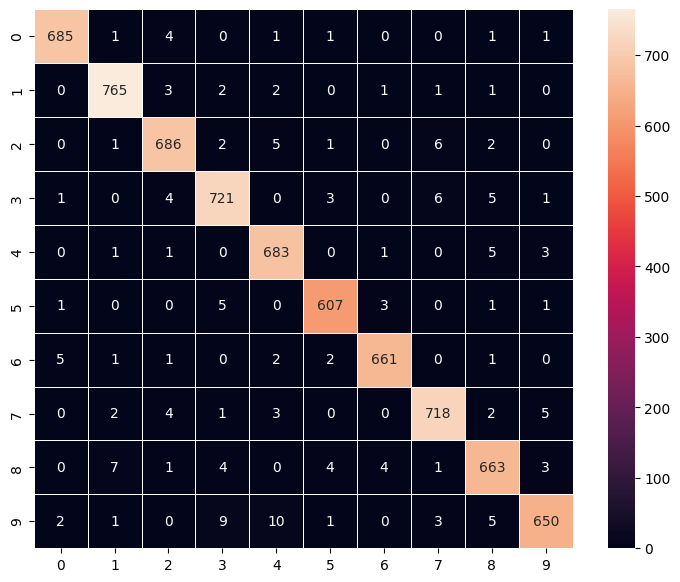

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Load castom data

In [ ]:
# Load the image
img = cv2.imread('3.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply threshold equalization
im_bw = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY_INV)[1]

# Resize images
im = cv2.resize(im_bw, (28, 28))

In [ ]:
data = np.array([im])

im_data = tf.keras.utils.normalize(data,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
prediction ->  0


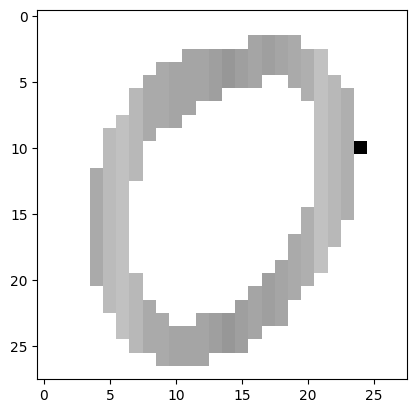

In [ ]:
predictions=new_model.predict([im_data])
print('prediction -> ',np.argmax(predictions[0]))

plt.imshow(im_data[0], cmap=plt.cm.binary)
plt.show()